<a href="https://colab.research.google.com/github/ErikFantomex/Fortran/blob/main/Elementos_b%C3%A1sicos_de_MPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

#Programa secuencial

## C

In [ ]:
%%writefile saludo_sec.c
#include<stdio.h>
int main ( ){
    printf("Hola, mundo de C + MPI");

    return 0;
}

Writing saludo_sec.c


In [ ]:
%%script bash
gcc saludo_sec.c -o saludo1
./saludo1

Hola, mundo de C + MPI

## C++

In [ ]:
%%writefile saludo_sec.cpp
//#include<stdio.h>
#include <iostream>
#include <iomanip>
using namespace std;
int main ( ){
    cout << "Hola, mundo de C++ + MPI";

    return 0;
}

Writing saludo_sec.cpp


In [ ]:
%%script bash
c++ saludo_sec.cpp -o saludo2
./saludo2

Hola, mundo de C++ + MPI

# Elementos básicos
----------------------------------

Un programa MPI consiste de procesos autónomos, que ejecutan su propio código, al estilo MIMD. El código ejecutado por cada proceso no es idéntico. Los procesos se comunican a través de llamadas a funciones de comunicación MPI. 






Todos los nombres MPI comienzan con MPI_, y la primera letra del nombre restante empieza en mayúsculas.  

 

Casi todas las funciones regresan un código de error: MPI_SUCESS indica a un valor de retorno exitoso. 

Casi todas las funciones de MPI deben ser llamadas después de inicializar el ambiente MPI mediante la llamada a la función **MPI_Init()** y casi ninguna función puede ser llamada después de finalizado este ambiente mediante **MPI_FInalize()**.



## Bosquejo de un programa **C/C++** + MPI 

```
#include<mpi.h>
void main ( ){
      // La declaración de variables puede ser antes o después de inicializado el ambiente MPI

      MPI_Init ( NULL, NULL ); 
         // aqui van la mayoría de las llamadas MPI    
      MPI_Finalize ( );

      return;
}
```
aunque también puede recibir argumentos desde la línea de comados (ver el ejemplo2), como sigue
```
#include<mpi.h>
void main ( int argc, char **argv ){
      // La declaración de variables puede ser antes o después de inicializado el ambiente MPI

      MPI_Init( &argc, &argv ); 
         // aqui van la mayoría de las llamadas MPI    
      MPI_Finalize( );

      return;
}
```


## Bosquejo de un programa **Python** + MPI

Debe importarse la librería mpi4py, después de lo cual se inicia automáticamente el ambiente MPI y se cierra cuando finaliza el programa. Así que un programa MPI tendrá la siguiente forma cuando se utiliza el comunicador MPI_COMM_WORLD.



```
from mpi4py import  MPI

```








[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

# Funciones básicas

## MPI_INIT()

## MPI_FINALIZE()

## MPI_COMM_SIZE


---

---








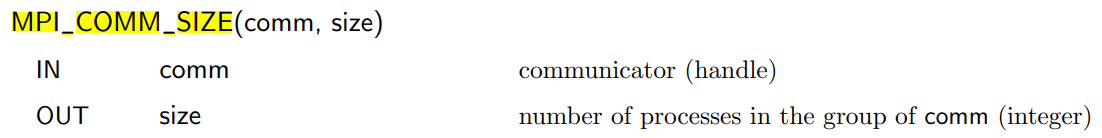



Esta función indica el número de procesos involucrados en un comunicador. Para MPI_COMM_WORLD, indica el número de procesos totales disponibles. Nótese que el número de procesos en MPI_COMM_WORLD no cambia durante la vida del programa MPI.

En C/C++, el protitipo de la funcion es 
```
int MPI_Comm_size(MPI_Comm comm, int *size)
```

En Python
```
size = comm.Get_size()
```



## MPI_COMM_RANK


---


---



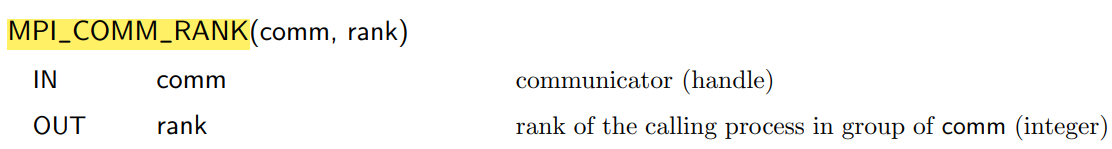



Indica el número que le corresponde que hace la llamada en el rango 0,..., *size*-1, donde *size* es el valor regresado por MPI_COMM_SIZE.

En C/C++, el prototipo de la función es 
```
int **MPI_Comm_rank**(MPI_Comm comm, int *rank)
```

En Python, 
```
size = comm.Get_rank()
```

[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

# Ejemplo1. Saludo desde cada proceso

## C

In [ ]:
%%writefile saludo.c

#include<stdio.h>
#include<mpi.h>

void main ( ){
    int rank, size, ind1,ind2 ;
    MPI_Init (NULL,NULL) ;
    
    ind1 = MPI_Comm_rank (MPI_COMM_WORLD,&rank ) ; // Identificador de proceso
    ind2 = MPI_Comm_size (MPI_COMM_WORLD,&size ) ; // numero de procesos
    
    if( ind1==MPI_SUCCESS && ind2==MPI_SUCCESS)
      printf( "Hola, mundo, desde el proceso %d de %d\n" ,rank, size);

    MPI_Finalize ( ) ;
    return ;
}


Writing saludo.c


In [ ]:
%%script bash
mpicc saludo.c -o saludo
mpirun --allow-run-as-root -np 3 saludo

Hola, mundo, desde el proceso 0 de 3
Hola, mundo, desde el proceso 2 de 3
Hola, mundo, desde el proceso 1 de 3


## C++

In [ ]:
%%writefile saludo.cpp
#include <iostream>
#include <cstdlib>
#include <mpi.h>

using namespace std;

int main()
{
    int rank, size;

    MPI_Init(NULL, NULL);

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador
 
    cout << "Hola, mundo, desde el proceso " << rank << " de " << size << endl;    
    
    MPI_Finalize();
    return 0;
}

Writing saludo.cpp


In [ ]:
%%script bash
mpicxx  saludo.cpp -o saludo
mpirun --allow-run-as-root -np 3 saludo

Hola, mundo, desde el proceso 0 de 3
Hola, mundo, desde el proceso 1 de 3
Hola, mundo, desde el proceso 2 de 3


## PYTHON

In [ ]:
%pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185279 sha256=8aedd2a7186bed37f56d772ae346f897191bd35afd63d2f3ad05fe56130661c6
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py


In [ ]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=845a311db1e169899e91965f189ccbb7249bf0edef422b2403d1cf9ccb5c09e8
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [ ]:
%%writefile saludo.py
from mpi4py import  MPI
import emoji

comm  = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

print("Hola, mundo, desde el proceso", rank,"de",size,  emoji.emojize('... Python es :thumbs_up:'))

Writing saludo.py


In [ ]:
%%script bash
mpiexec -allow-run-as-root -np 3    python saludo.py

Hola, mundo, desde el proceso 1 de 3 ... Python es 👍
Hola, mundo, desde el proceso 2 de 3 ... Python es 👍
Hola, mundo, desde el proceso 0 de 3 ... Python es 👍


## FORTRAN

In [ ]:
%%writefile hello_world_mpi.f90
PROGRAM HELLO_WORLD_MPI
USE MPI

INTEGER  rank, size, ierror

CALL MPI_INIT(ierror)
CALL MPI_COMM_SIZE(MPI_COMM_WORLD,size,ierror)
CALL MPI_COMM_RANK(MPI_COMM_WORLD,rank,ierror)

WRITE(*,*) "Hola, Mundo, desde el proceso ", rank, "de ", size

CALL MPI_FINALIZE(ierror)
END PROGRAM

Writing hello_world_mpi.f90


In [ ]:
%%script bash
mpif90  hello_world_mpi.f90 -o saludo
mpirun --allow-run-as-root -np 4 saludo

 Hola, Mundo, desde el proceso            2 de            4
 Hola, Mundo, desde el proceso            3 de            4
 Hola, Mundo, desde el proceso            0 de            4
 Hola, Mundo, desde el proceso            1 de            4


[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

# Ejemplo2. Saludo con argumentos

## C

In [ ]:
%%writefile saludo_args.c
#include <stdlib.h>
#include "mpi.h"
#include <stdio.h>

void main (int argc, char** argv) {
    int rank,size,m;
    float x;
    char *cadena = argv[2];

    MPI_Init(&argc, &argv);
    
    if(argc!=4){
        printf("se requiere que se envien 4 argumentos");
        MPI_Finalize();
        return;
    }
    
    m = atoi(argv[1]);
    x = atof(argv[3]);    

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank!=0) printf("\t Soy el proceso = %d de %d \n",rank,size);
    
    printf("\nSoy el %d y recibi el argumento %d, '%s' y %f\n",rank,m, cadena, x); 

    MPI_Finalize(); 
    return ;
}


Writing saludo_args.c


In [ ]:
%%script bash
mpicc saludo_args.c -o saludo_args
mpirun --allow-run-as-root -np 5 saludo_args 8 "La UniSon rifa" 2.1

	 Soy el proceso = 1 de 5 

Soy el 1 y recibi el argumento 8, 'La UniSon rifa' y 2.100000
	 Soy el proceso = 4 de 5 

Soy el 4 y recibi el argumento 8, 'La UniSon rifa' y 2.100000

	 Soy el proceso = 3 de 5 

Soy el 3 y recibi el argumento 8, 'La UniSon rifa' y 2.100000
Soy el 0 y recibi el argumento 8, 'La UniSon rifa' y 2.100000
	 Soy el proceso = 2 de 5 

Soy el 2 y recibi el argumento 8, 'La UniSon rifa' y 2.100000


## C++

In [ ]:
%%writefile saludo_args.cpp
#include <cstdlib>
#include <mpi.h>
#include <iostream>

using namespace std;

int main (int argc, char** argv)
{
    MPI_Init(&argc, &argv);
    int rank,size,m;
    float x;
    char *cadena = argv[2];

    if(argc!=4){
      cout << "se requiere de un argumento" << endl;
      MPI_Finalize();
      return 1;
    }
    m = atoi(argv[1]);
    x = atof(argv[3]);


    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank!=0)
	    cout <<"\t Soy el proceso = " << rank <<" de " << size <<endl;
    else
      cout << "Soy el " << rank << " y recibi el argumento " << m << ", '"<< cadena << "' y " << x << endl;

    MPI_Finalize(); 
    return 0;
}


Overwriting saludo_args.cpp


In [ ]:
%%script bash
mpicxx  saludo_args.cpp -o saludo_args
mpirun --allow-run-as-root -np 5 saludo_args  8 "La UniSon rifa" 2.1

	 Soy el proceso = 1 de 5
	 Soy el proceso = 3 de 5
	 Soy el proceso = 4 de 5
Soy el 0 y recibi el argumento 8, 'La UniSon rifa' y 2.1
	 Soy el proceso = 2 de 5


## PYTHON

In [ ]:
!pip install mpi4py

     |████████████████████████████████| 2.4 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.1-cp37-cp37m-linux_x86_64.whl size=2180592 sha256=e565e10ce469716c1b340bba1f9de0114189a8b7f94573c57ca37c0ceb442236
  Stored in directory: /root/.cache/pip/wheels/91/be/c0/2b0347be1de5cd8ca9fe67da7ec8c3fe8930fcb6b0df6f2255
Successfully built mpi4py


In [ ]:
%%writefile saludo_args.py
from mpi4py import MPI
import sys

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if(len(sys.argv)!=4):
  print("se requiere de un argumento")
  sys.exit()


m = int(sys.argv[1])
cadena = sys.argv[2]
x = float(sys.argv[3])

if(rank!=0):
  print("\t Soy el proceso =",rank,"de", size)
if(rank==0):
  print("Soy el",rank, "y recibi el argumento",m, ", '",cadena, "' y ",x)


Writing saludo_args.py


In [ ]:
%%script bash
mpiexec -allow-run-as-root -n 5 python saludo_args.py  8 "La UniSon rifa" 2.1

	 Soy el proceso = 2 de 5
	 Soy el proceso = 3 de 5
	 Soy el proceso = 1 de 5
Soy el 0 y recibi el argumento 8 , ' La UniSon rifa ' y  2.1
	 Soy el proceso = 4 de 5


##FORTRAN

In [ ]:
%%writefile saludo_args.f90
PROGRAM SALUDO_ARGS
  USE MPI

  CHARACTER(len=32)  arg
  INTEGER  rank, size, ierror, count, i

  CALL MPI_INIT(ierror)
  CALL MPI_COMM_SIZE(MPI_COMM_WORLD,size,ierror)
  CALL MPI_COMM_RANK(MPI_COMM_WORLD,rank,ierror)
  
  IF (COMMAND_ARGUMENT_COUNT().EQ.3) THEN
      IF (rank.EQ.0) THEN
        WRITE (*,fmt="(1x,a,i0)", advance="no") "Soy el proceso 0 y recibí los argumentos:"
        DO i = 1, iargc()
          CALL getarg(i, arg)
          WRITE (*,10, advance="no")  arg
          10 FORMAT (1x,a,i0)
        END DO
      ELSE
        WRITE (*,*) "Soy el proceso ", rank, "de ", size
    END IF
  ELSE
    WRITE (*,*) "Se requiere de 3 argumentos"
    CALL MPI_FINALIZE(ierror)
    STOP   
  END IF
  CALL MPI_FINALIZE(ierror)
END PROGRAM

Writing saludo_args.f90


In [ ]:
%%script bash
mpif90 saludo_args.f90 -o saludo_args
mpirun --allow-run-as-root -np 5 saludo_args  8 "La UniSon rifa" 2.1

 Soy el proceso            3 de            5
 Soy el proceso            2 de            5
 Soy el proceso            1 de            5
 Soy el proceso            4 de            5
 Soy el proceso 0 y recibí los argumentos: 8                                La UniSon rifa                   2.1                             

[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

# Ejemplo3. Midiendo Tiempos

## MPI_WTIME()

##C

In [ ]:
%%writefile midiendotiempo.c

#include "mpi.h"
#include <stdio.h>
#include <unistd.h>

int main( ){
    double t1, t2;
    int rank,size;

    MPI_Init( NULL, NULL );
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    MPI_Barrier(MPI_COMM_WORLD);
    t1 = MPI_Wtime();

    sleep(3); // espera por un tiempo en segundos

    MPI_Barrier(MPI_COMM_WORLD);
    t2 = MPI_Wtime();

    if(rank==0)
       printf("MPI_Wtime measured a 3 second sleep to be: %.10f segundos \n", t2-t1);

    MPI_Finalize( );
    return 0;
}

Writing midiendotiempo.c


In [ ]:
%%script bash
mpicc midiendotiempo.c -o tiempos
mpirun --allow-run-as-root -np 5 tiempos

MPI_Wtime measured a 3 second sleep to be: 3.0006683080 segundos 


##C++

In [ ]:
%%writefile midiendotiempo.cpp

#include <cstdlib>
#include <mpi.h>
#include <iostream>
#include <unistd.h>
#include <iomanip>

using namespace std;

int main( ){
    double t1, t2;
    int rank,size;

    MPI_Init( NULL, NULL);
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    MPI_Barrier(MPI_COMM_WORLD);
    t1 = MPI_Wtime();

    sleep(3); // espera por un tiempo en segundos

    MPI_Barrier(MPI_COMM_WORLD);
    t2 = MPI_Wtime();

    if(rank==0)
       cout <<"MPI_Wtime measured a 3 second sleep to be: " << fixed << setprecision(10) << t2-t1 << " segundos" <<endl;

    MPI_Finalize( );
    return 0;
}

Writing midiendotiempo.cpp


In [ ]:
%%script bash
mpicxx  midiendotiempo.cpp -o tiempos
mpirun --allow-run-as-root -np 5 tiempos

MPI_Wtime measured a 3 second sleep to be: 3.0003875790 segundos


##PYTHON

In [ ]:
!pip install mpi4py

In [ ]:
%%writefile midiendotiempo.py
from mpi4py import  MPI
from time import sleep

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

comm.Barrier()
t1 = MPI.Wtime()

sleep(3)

comm.Barrier()
t2 = MPI.Wtime()

if (rank == 0):
  print("MPI_Wtime measured a 3 second sleep to be: ", t2-t1, "segundos")


Overwriting midiendotiempo.py


In [ ]:
%%script bash

mpiexec -allow-run-as-root -n 5 python midiendotiempo.py

MPI_Wtime measured a 3 second sleep to be:  3.0039424130000043 segundos


##FORTRAN

In [ ]:
%%writefile midiendotiempo.f90
PROGRAM MIDIENDOTIEMPO
    USE MPI
    DOUBLE PRECISION t1, t2
    INTEGER rank,size, ierror

    CALL MPI_INIT(ierror)
    CALL MPI_COMM_SIZE(MPI_COMM_WORLD,size,ierror)
    CALL MPI_COMM_RANK(MPI_COMM_WORLD,rank,ierror)

    CALL MPI_BARRIER(MPI_COMM_WORLD,ierror)
    t1 = MPI_WTIME()

    CALL SLEEP(3)

    CALL MPI_BARRIER(MPI_COMM_WORLD, ierror)
    t2 = MPI_WTIME()

    IF (rank==0) THEN
        WRITE(*,*) "MPI_Wtime measured a 3 second sleep to be: " , (t2-t1), " segundos"
    END IF

    CALL MPI_FINALIZE(ierror)
END PROGRAM

Overwriting midiendotiempo.f90


In [ ]:
%%script bash
mpif90  midiendotiempo.f90 -o tiempo
mpirun --allow-run-as-root -np 4 ./tiempo

 MPI_Wtime measured a 3 second sleep to be:    3.0003086830000143       segundos


[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

# Ejemplo4. Versión de MPI


## MPI_GET_VERSION


---



---

Hay dos formas de saber cuál versión de MPI está instalada en la máquina que usamos: 1) llamando a MPI_VERSION() y MPI_SUBVERSION() y, 2)  llamando a MPI_Get_version().

[texto del vínculo](https://)




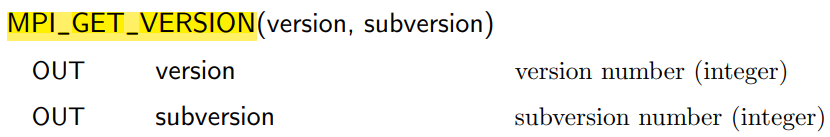


En C/C++
```
int MPI_Get_version(int *version, int *subversion)
```

En Python
```
version = MPI.Get_version() 
```


## C

In [ ]:
%%writefile ejemplo4_version_mpi.c

#include <stdlib.h>
#include "mpi.h"
#include <stdio.h>

void main () {
    int rank, size;
	int version, subversion, ignorar;
    int resultlen;
    char vendor[MPI_MAX_LIBRARY_VERSION_STRING];

    MPI_Init(NULL, NULL);

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank==0){
	    printf("1) Version mpi= %d.%d \n",MPI_VERSION,MPI_SUBVERSION); 
    	MPI_Get_version(&version,&subversion);
	    printf("2) Version mpi= %d, subversion=%d\n",version,subversion);
        MPI_Get_library_version(vendor, &ignorar);
        printf("Implementación: %s", vendor);
    }

    MPI_Finalize(); 
    return ;
}

Writing ejemplo4_version_mpi.c


In [ ]:
%%script bash
mpicc ejemplo4_version_mpi.c -o version
mpirun --allow-run-as-root -np 5 version

1) Version mpi= 3.1 
2) Version mpi= 3, subversion=1
Implementación: Open MPI v2.1.1, package: Open MPI buildd@lcy01-amd64-009 Distribution, ident: 2.1.1, repo rev: v2.1.0-100-ga2fdb5b, May 10, 2017

## C++

In [ ]:
%%writefile ejemplo4_version_mpi.cpp

#include <iostream>
#include <cstdlib>
#include <mpi.h>

using namespace std;

int main ()
{
    int rank, size;
	  int version, subversion, ignorar;
    char vendor[MPI_MAX_LIBRARY_VERSION_STRING];
    MPI_Init(NULL, NULL);

    MPI_Comm_size(MPI_COMM_WORLD, &size); // Numero total de procesos
    MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

    if(rank==0){
	    cout << "1) Version mpi= " << MPI_VERSION << "." << MPI_SUBVERSION << endl; 
    	MPI_Get_version(&version,&subversion);
	    cout << "2) Version mpi= "<< version <<", subversion= " << subversion << endl;

      MPI_Get_library_version(vendor, &ignorar);
      cout << "Implementación: " << vendor;
    }

    MPI_Finalize(); 
    return 0;
}

Overwriting ejemplo4_version_mpi.cpp


In [ ]:
%%script bash
mpicxx  ejemplo4_version_mpi.cpp -o version
mpirun --allow-run-as-root -np 5 version

1) Version mpi= 3.1
2) Version mpi= 3, subversion= 1
Implementación: Open MPI v2.1.1, package: Open MPI buildd@lcy01-amd64-009 Distribution, ident: 2.1.1, repo rev: v2.1.0-100-ga2fdb5b, May 10, 2017

## PYTHON

!pip install mpi4py

In [ ]:
!pip install mpi4py

In [ ]:
%%writefile ejemplo4_version_mpi.py
from mpi4py import  MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    print("1) Version mpi= " + str(MPI.VERSION) + "." + str(MPI.SUBVERSION))
    version,subversion = MPI.Get_version()
    print("2) Version mpi= "+ str(version) + ", subversion= " +str(subversion))

    print('Implementación:',MPI.Get_library_version())


Overwriting ejemplo4_version_mpi.py


In [ ]:
%%script bash

mpiexec -allow-run-as-root -n 2 python ejemplo4_version_mpi.py

1) Version mpi= 3.1
2) Version mpi= 3, subversion= 1
Implementación: Open MPI v2.1.1, package: Open MPI buildd@lcy01-amd64-009 Distribution, ident: 2.1.1, repo rev: v2.1.0-100-ga2fdb5b, May 10, 2017 


##FORTRAN

In [ ]:
%%writefile version_mpi.f90
PROGRAM VERSION_MPI
    USE MPI

    INTEGER ierror, rank, size, version, subversion
    CHARACTER, DIMENSION(MPI_MAX_LIBRARY_VERSION_STRING) :: vendor

    CALL MPI_INIT(ierror)
    CALL MPI_COMM_SIZE(MPI_COMM_WORLD,size,ierror)
    CALL MPI_COMM_RANK(MPI_COMM_WORLD,rank,ierror)

    IF (rank == 0) THEN
        WRITE(*,*) "1) Version mpi= " ,MPI_VERSION, MPI_SUBVERSION
        CALL MPI_GET_VERSION(version,subversion,ierror)
        WRITE(*,*) "2) Version mpi= " ,version, subversion
    END IF

    CALL MPI_FINALIZE(ierror)
END PROGRAM

Writing version_mpi.f90


In [ ]:
%%script bash
mpif90  version_mpi.f90 -o version
mpirun --allow-run-as-root -np 4 ./version

 1) Version mpi=            3           1
 2) Version mpi=            3           1


[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

#Máximos para enteros
Tomado de https://docs.microsoft.com/en-us/cpp/c-language/cpp-integer-limits?view=msvc-160 

##C++

In [ ]:
%%writefile maximos.cpp
#include<limits.h>
#include <iostream>
#include <iomanip>
using namespace std;
int main(   ){        
    cout << "SHRT_MAX  = " << setiosflags (ios::right) << setw(20) << SHRT_MAX  << endl;    
    cout << "USHRT_MAX = " << setiosflags (ios::right) << setw(20) << USHRT_MAX << endl;
    cout << "INT_MAX   = " << setiosflags (ios::right) << setw(20) << INT_MAX   << endl;
    cout << "UINT_MAX  = " << setiosflags (ios::right) << setw(20) << UINT_MAX  << endl;
    cout << "LONG_MAX  = " << setiosflags (ios::right) << setw(20) << LONG_MAX  << endl;
    cout << "ULONG_MAX = " << setiosflags (ios::right) << setw(20) << ULONG_MAX << endl;
    cout << "LLONG_MAX = " << setiosflags (ios::right) << setw(20) << LLONG_MAX << endl;
    cout << "ULLONG_MAX= " << setiosflags (ios::right) << setw(20) << ULLONG_MAX<< endl;
    return 0;
} 

Writing maximos.cpp


In [ ]:
%%script bash
c++ maximos.cpp -o maximos
./maximos 

SHRT_MAX  =                32767
USHRT_MAX =                65535
INT_MAX   =           2147483647
UINT_MAX  =           4294967295
LONG_MAX  =  9223372036854775807
ULONG_MAX = 18446744073709551615
LLONG_MAX =  9223372036854775807
ULLONG_MAX= 18446744073709551615


[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

#MPI_ABORT

*MPI_Abort* finaliza los procesos que pertenecen al comunicador indicado en el argumento. Cuando el comunicador indicado es MPI_COMM_WORLD, equivale a cerrar toda la aplicación MPI (si el comunicador pasado es un subconjunto de MPI_COMM_WORLD, es posible que una implementación de MPI no termine solo los procesos que pertenecen a este comunicador. En cuyo caso, todos los procesos se terminan en su lugar). 

El estándar MPI no estipula ninguna directiva con respecto a cómo se debe manejar el código de error pasado. Sin embargo, en un entorno UNIX o POSIX, el código de error dado "debería" convertirse en el valor devuelto por el programa principal.

##C

int **MPI_Abort**(MPI_Comm communicator,
              int error_code);

In [ ]:
%%writefile ejemplo_abort.c
#include <stdio.h>
#include <stdlib.h>
#include <mpi.h>
int main( ){
    MPI_Init(NULL,NULL);    
 
    MPI_Abort(MPI_COMM_WORLD, EXIT_FAILURE);
 
    MPI_Finalize(); 
    return EXIT_SUCCESS;
}

Writing ejemplo_abort.c


In [ ]:
%%script bash
mpicc ejemplo_abort.c -o ejemplo_abort
mpirun --allow-run-as-root -np 3 ejemplo_abort

--------------------------------------------------------------------------
MPI_ABORT was invoked on rank 1 in communicator MPI_COMM_WORLD
with errorcode 1.

NOTE: invoking MPI_ABORT causes Open MPI to kill all MPI processes.
You may or may not see output from other processes, depending on
exactly when Open MPI kills them.
--------------------------------------------------------------------------


[36102d3647f7:00218] 2 more processes have sent help message help-mpi-api.txt / mpi-abort
[36102d3647f7:00218] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages


CalledProcessError: ignored

[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)